In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
stock_data = pd.read_csv("stocks.csv")

In [4]:
stock_data.head()

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,AAPL,2023-02-07,150.639999,155.229996,150.639999,154.649994,154.414230,83322600
1,AAPL,2023-02-08,153.880005,154.580002,151.169998,151.919998,151.688400,64120100
2,AAPL,2023-02-09,153.779999,154.330002,150.419998,150.869995,150.639999,56007100
3,AAPL,2023-02-10,149.460007,151.339996,149.220001,151.009995,151.009995,57450700
4,AAPL,2023-02-13,150.949997,154.259995,150.919998,153.850006,153.850006,62199000


In [12]:
stock_data.shape

(248, 7)

In [7]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Ticker     248 non-null    object 
 1   Date       248 non-null    object 
 2   Open       248 non-null    float64
 3   High       248 non-null    float64
 4   Low        248 non-null    float64
 5   Close      248 non-null    float64
 6   Adj Close  248 non-null    float64
 7   Volume     248 non-null    int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 15.6+ KB


In [8]:
stock_data.isnull().sum()

Ticker       0
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [9]:
stock_data["Date"] = pd.to_datetime(stock_data["Date"])

stock_data.set_index("Date", inplace=True)

In [10]:
stock_data.head()

,Ticker,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2023-02-07,AAPL,150.639999,155.229996,150.639999,154.649994,154.414230,83322600
2023-02-08,AAPL,153.880005,154.580002,151.169998,151.919998,151.688400,64120100
2023-02-09,AAPL,153.779999,154.330002,150.419998,150.869995,150.639999,56007100
2023-02-10,AAPL,149.460007,151.339996,149.220001,151.009995,151.009995,57450700
2023-02-13,AAPL,150.949997,154.259995,150.919998,153.850006,153.850006,62199000


In [11]:
stock_data.shape

(248, 7)

In [13]:
# Percentage 
stock_returns = stock_data.groupby("Ticker")["Close"].pct_change().dropna()

In [14]:
stock_returns.head()

Date
2023-02-08   -0.017653
2023-02-09   -0.006912
2023-02-10    0.000928
2023-02-13    0.018807
2023-02-14   -0.004225
Name: Close, dtype: float64

In [20]:
# Compute standard deviation of stock returns to measure volatility
volatility = stock_returns.groupby(stock_returns.index).std()

In [21]:
# Display the first 5 rows of calculated volatility
volatility.head()

Date
2023-02-08    0.037368
2023-02-09    0.017783
2023-02-10    0.019883
2023-02-13    0.014352
2023-02-14    0.003728
Name: Close, dtype: float64

In [23]:
# Find the stock with the highest volatility (most risky)
most_volatile_stock = volatility.idxmax()

In [24]:
# Display the most volatile stock
print("Most Volatile Stock:", most_volatile_stock)

Most Volatile Stock: 2023-03-23 00:00:00


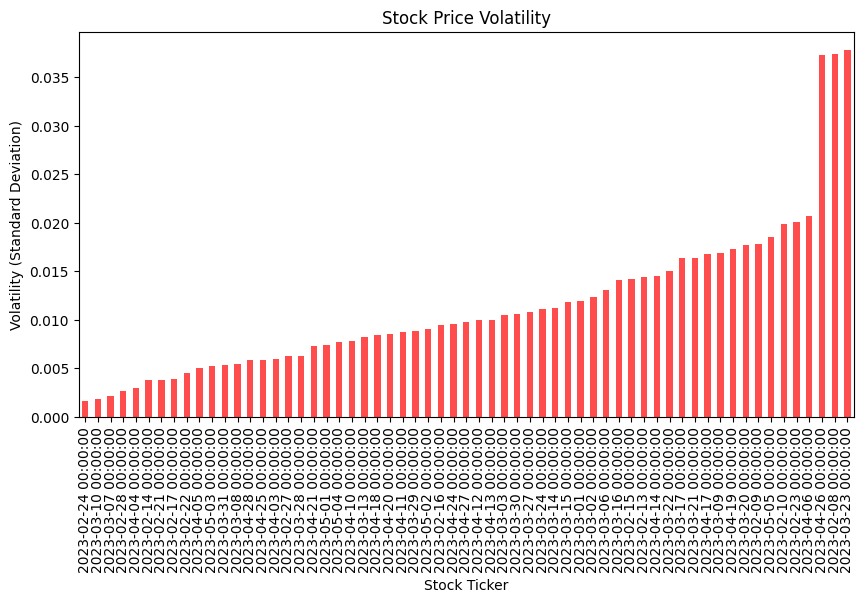

In [25]:
# Plot the volatility of stocks in a bar chart
plt.figure(figsize=(10, 5))
volatility.sort_values().plot(kind='bar', color='red', alpha=0.7)
plt.xlabel("Stock Ticker")  
plt.ylabel("Volatility (Standard Deviation)") 
plt.title("Stock Price Volatility")
plt.show() 